# TP 2

## 1
la fonctionnelle: 
$$
L_\tau(u) = \tau\int_0^T g(u(t)),dt + (1-\tau)\int_0^T f(I(t)),dt.
$$
- $\int_0^T g(u(t))dt$ : Ceci indique que « plus les restrictions sont strictes, plus le coût est élevé », représentant le coût économique.

- $\int_0^T f(I(t))dt$ : Ceci indique que « plus il y a d'infections, plus le coût est important », représentant le coût sanitaire.

Par conséquent, $L_\tau$ est la somme pondérée du « coût économique » et du « coût sanitaire ».

## 2


$$
\begin{cases}
S'(t) = -u(t)\dfrac{S(t)I(t)}{N(t)} \\
I'(t) = u(t)\dfrac{S(t)I(t)}{N(t)} - \beta I(t) \\
R'(t) = \beta I(t)
\end{cases}
$$


$$
N'(t) = S'(t)+I'(t)+R'(t).
$$


$$
\begin{aligned}
N'(t)
&= \left(-u\dfrac{SI}{N}\right)

+ \left(u\dfrac{SI}{N}-\beta I\right)
+ \beta I \\
  &= -u\dfrac{SI}{N} + u\dfrac{SI}{N} -\beta I + \beta I \\
  &= 0.
  \end{aligned}
$$


$$
N(t)\equiv N(0)=S_0+I_0+R_0,
$$



## 3

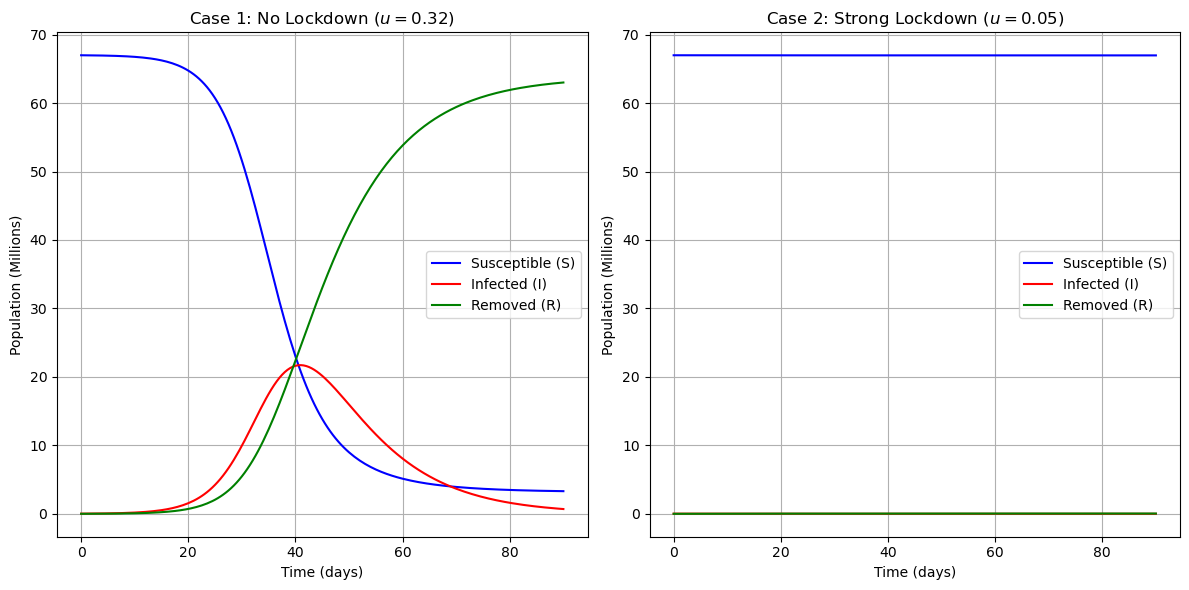

In [4]:
import numpy as np
import matplotlib.pyplot as plt

N = 6.7e7
beta = 0.1
alpha = 0.32
T = 90
dt = 0.5
steps = int(T/dt)
time = np.linspace(0, T, steps + 1)

I0 = 2e4
R0 = 0
S0 = N - I0 - R0
Y0 = np.array([S0, I0, R0])

def sir_derivatives(Y, u_val):
    S, I, R = Y
    dS = -u_val * S * I / N
    dI = u_val * S * I / N - beta * I
    dR = beta * I
    return np.array([dS, dI, dR])

def rk4_step(Y, u_val, h):
    k1 = sir_derivatives(Y, u_val)
    k2 = sir_derivatives(Y + 0.5 * h * k1, u_val)
    k3 = sir_derivatives(Y + 0.5 * h * k2, u_val)
    k4 = sir_derivatives(Y + h * k3, u_val)
    return Y + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)

def solve_sir(u_constant):
    results = np.zeros((steps + 1, 3))
    results[0] = Y0
    current_Y = Y0.copy()
    
    for i in range(steps):
        current_Y = rk4_step(current_Y, u_constant, dt)
        results[i+1] = current_Y
    return results

u1 = alpha
res1 = solve_sir(u1)

epsilon = 0.05
u2 = epsilon
res2 = solve_sir(u2)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(time, res1[:, 0]/1e6, label='Susceptible (S)', color='blue')
plt.plot(time, res1[:, 1]/1e6, label='Infected (I)', color='red')
plt.plot(time, res1[:, 2]/1e6, label='Removed (R)', color='green')
plt.title(f'Case 1: No Lockdown ($u={u1}$)')
plt.xlabel('Time (days)')
plt.ylabel('Population (Millions)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(time, res2[:, 0]/1e6, label='Susceptible (S)', color='blue')
plt.plot(time, res2[:, 1]/1e6, label='Infected (I)', color='red')
plt.plot(time, res2[:, 2]/1e6, label='Removed (R)', color='green')
plt.title(f'Case 2: Strong Lockdown ($u={u2}$)')
plt.xlabel('Time (days)')
plt.ylabel('Population (Millions)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 4 Calcul du gradient (méthode adjointe)

Soit $u\in U_\alpha$ et une perturbation admissible $u_\varepsilon=u+\varepsilon h$.
On note
$$
\delta X=(\delta S,\delta I,\delta R)^\top
=\left.\frac{d}{d\varepsilon}(S_\varepsilon,I_\varepsilon,R_\varepsilon)\right|_{\varepsilon=0}.
$$
### Différentielle du critère
$$
DL_\tau(u)\cdot h
=\tau\int_0^T g'(u),h,dt
+(1-\tau)\int_0^T f'(I),\delta I,dt.
\tag{1}
$$
### Équation linéarisée

Comme $N=S+I+R$ est constant,
$$
\delta X' = A,\delta X
+ h
\begin{pmatrix}
-\dfrac{SI}{N}\\
\dfrac{SI}{N}\\
0
\end{pmatrix},
\qquad \delta X(0)=0,
$$
  avec
$$
A=
\begin{pmatrix}
-\frac{uI}{N}&-\frac{uS}{N}&0\\
\frac{uI}{N}&\frac{uS}{N}-\beta&0\\
0&\beta&0
\end{pmatrix}.
$$
### État adjoint

On introduit l’état adjoint $P=(P_1,P_2,P_3)^\top$ solution de
$$
- P' = A^\top P +
\begin{pmatrix}
0\\ f'(I)\\ 0
\end{pmatrix},
\qquad P(T)=0.
$$
Par intégration par parties et en utilisant $\delta X(0)=0$ et $P(T)=0$, on obtient
$$
\int_0^T f'(I)\delta Idt
=\int_0^T h(t)\frac{SI}{N}(P_2-P_1)dt.
$$
### Gradient

Ainsi,
$$
DL_\tau(u)\cdot h
=\int_0^T h(t)\Big[\tau g'(u)
+(1-\tau)\frac{SI}{N}(P_2-P_1)
\Big]dt,
$$
et l’on définit le gradient
$$
\boxed{
\nabla L_\tau(u)
=\tau g'(u)
+(1-\tau)\frac{SI}{N}(P_2-P_1).
}
$$

## 5

In [5]:
import numpy as np
import matplotlib.pyplot as plt

N = 6.7e7
beta = 0.1
alpha = 0.32
T = 90
dt = 0.5
steps = int(T / dt)
time_grid = np.linspace(0, T, steps + 1)

I0 = 2e4
R0 = 0
S0 = N - I0 - R0
Y0 = np.array([S0, I0, R0])

def g(u): return 0.5 * (alpha**2 - u**2)
def g_prime(u): return -u
def f(I): return I
def f_prime(I): return 1.0

def sir_deriv(Y, u_val):
    S, I, R = Y
    dS = -u_val * S * I / N
    dI = u_val * S * I / N - beta * I
    dR = beta * I
    return np.array([dS, dI, dR])

def solve_forward(u_array):
    results = np.zeros((steps + 1, 3))
    results[0] = Y0
    Y = Y0.copy()
    
    for i in range(steps):
        u_val = u_array[i]
        
        k1 = sir_deriv(Y, u_val)
        k2 = sir_deriv(Y + 0.5*dt*k1, u_val)
        k3 = sir_deriv(Y + 0.5*dt*k2, u_val)
        k4 = sir_deriv(Y + dt*k3, u_val)
        
        Y = Y + (dt/6.0)*(k1 + 2*k2 + 2*k3 + k4)
        results[i+1] = Y
        
    return results

def adjoint_deriv(P, S, I, u_val):
    P1, P2, P3 = P
    
    at_p_1 = (-u_val * I / N) * P1 + (u_val * I / N) * P2
    at_p_2 = (-u_val * S / N) * P1 + (u_val * S / N - beta) * P2 + beta * P3
    at_p_3 = 0
    
    cost_vec_1 = 0
    cost_vec_2 = f_prime(I)
    cost_vec_3 = 0
    
    dP1 = - (at_p_1 + cost_vec_1)
    dP2 = - (at_p_2 + cost_vec_2)
    dP3 = - (at_p_3 + cost_vec_3)
    
    return np.array([dP1, dP2, dP3])

def solve_backward(S_arr, I_arr, u_arr):
    P_results = np.zeros((steps + 1, 3))
    P_results[-1] = np.array([0, 0, 0])
    
    P = np.array([0.0, 0.0, 0.0])
   
    for i in range(steps - 1, -1, -1):
        S_val = S_arr[i]
        I_val = I_arr[i]
        u_val = u_arr[i]
        
        deriv = adjoint_deriv(P, S_val, I_val, u_val)
        P = P - dt * deriv
        
        P_results[i] = P
        
    return P_results

def compute_cost(u_arr, I_arr, tau):
    cost_u = np.sum(g(u_arr)) * dt
    cost_I = np.sum(f(I_arr[:-1])) * dt
    
    return tau * cost_u + (1 - tau) * cost_I

def optimize_control(tau, u_init_mode='alpha'):
    u_k = np.zeros(steps)
    if u_init_mode == 'alpha':
        u_k[:] = alpha
    elif u_init_mode == 'half':
        u_k[:] = alpha / 2
    elif u_init_mode == 'epsilon':
        u_k[:] = 0.001
    
    rho = 50.0
    epsilon_tol = 1e-4
    max_iter = 100
    
    cost_history = []
    
    res = solve_forward(u_k)
    current_cost = compute_cost(u_k, res[:, 1], tau)
    cost_history.append(current_cost)
    
    for k in range(max_iter):
        S_arr = res[:, 0]
        I_arr = res[:, 1]
        P_arr = solve_backward(S_arr, I_arr, u_k)
        
        P1 = P_arr[:-1, 0]
        P2 = P_arr[:-1, 1]
        S_grid = S_arr[:-1]
        I_grid = I_arr[:-1]
        
        grad_L = tau * g_prime(u_k) + (1 - tau) * (S_grid * I_grid / N) * (P2 - P1)
        
        accepted = False
        cpt = 0
        current_rho = rho
        
        while (cpt < 20) and (not accepted):
            u_next = u_k - current_rho * grad_L
            u_next = np.clip(u_next, 0, alpha)
            
            res_next = solve_forward(u_next)
            new_cost = compute_cost(u_next, res_next[:, 1], tau)
            
            Delta = new_cost - current_cost
            
            if Delta < 0:
                accepted = True
                u_k = u_next
                res = res_next
                current_cost = new_cost
                rho = current_rho 
            else:
                current_rho /= 1.5
                cpt += 1
        
        cost_history.append(current_cost)
        
        rel_error = abs((cost_history[-1] - cost_history[-2]) / cost_history[-2])
        if rel_error < epsilon_tol:
            print(f"Converged at iter {k}")
            break
            
    return u_k, res, cost_history

## 6

--- Processing tau = 0.1 ---
Converged at iter 1
Converged at iter 1
Converged at iter 1
Tau 0.1: Best init was 'alpha' with cost 1.85e+05
--- Processing tau = 0.5 ---
Converged at iter 1
Converged at iter 1
Converged at iter 1
Tau 0.5: Best init was 'alpha' with cost 1.03e+05
--- Processing tau = 0.9 ---
Converged at iter 1
Converged at iter 1
Converged at iter 1
Tau 0.9: Best init was 'alpha' with cost 2.05e+04


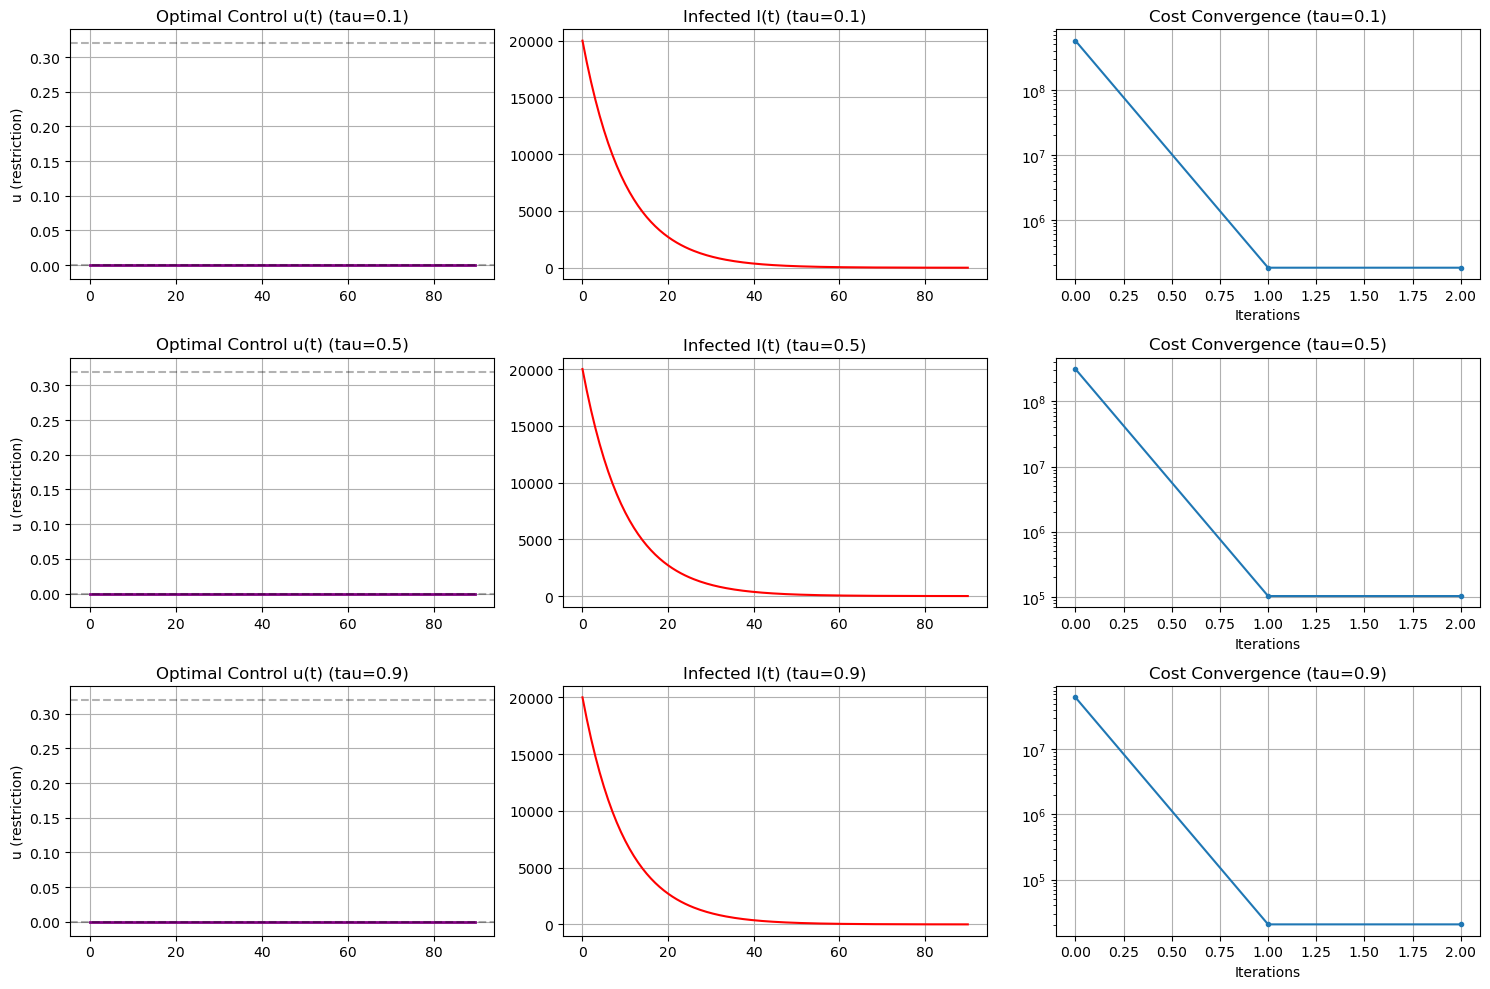

In [6]:
taus = [0.1, 0.5, 0.9]
init_modes = ['alpha', 'half', 'epsilon']

best_results = {}

plt.figure(figsize=(15, 10))

for i, tau in enumerate(taus):
    print(f"--- Processing tau = {tau} ---")
    min_final_cost = float('inf')
    best_u = None
    best_res = None
    best_hist = None
    best_mode = ""
    
    for mode in init_modes:
        u_opt, res_opt, cost_hist = optimize_control(tau, u_init_mode=mode)
        final_cost = cost_hist[-1]
        
        if final_cost < min_final_cost:
            min_final_cost = final_cost
            best_u = u_opt
            best_res = res_opt
            best_hist = cost_hist
            best_mode = mode
            
    best_results[tau] = (best_u, best_res, best_hist)
    print(f"Tau {tau}: Best init was '{best_mode}' with cost {min_final_cost:.2e}")

    plt.subplot(3, 3, i*3 + 1)
    plt.plot(time_grid[:-1], best_u, color='purple', linewidth=2)
    plt.axhline(y=alpha, color='k', linestyle='--', alpha=0.3, label='alpha')
    plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
    plt.title(f'Optimal Control u(t) (tau={tau})')
    plt.ylabel('u (restriction)')
    plt.ylim(-0.02, alpha+0.02)
    plt.grid(True)
    
    plt.subplot(3, 3, i*3 + 2)
    plt.plot(time_grid, best_res[:, 1], color='red', label='Infected')
    plt.title(f'Infected I(t) (tau={tau})')
    plt.grid(True)
    
    plt.subplot(3, 3, i*3 + 3)
    plt.plot(best_hist, marker='o', markersize=3)
    plt.title(f'Cost Convergence (tau={tau})')
    plt.xlabel('Iterations')
    plt.yscale('log')
    plt.grid(True)

plt.tight_layout()
plt.show()